## <span style="color:royalblue"><u>**Comparision of Triplets Trading Strategy vs Pairs Trading Strategy (with USO filter):**</u></span>
## <span style="color:royalblue"><u>**For three commodity-sector exchange-traded funds (GLD, GDX, USO)**</u></span>
## <span style="color:royalblue"> Date: May 2025 </span>

## <span style="color:royalblue"> Abstract </span>

This research presents a comparative analysis between a standalone triplets trading strategy versus a pairs
trading strategy enhanced with a USO volatility filter, applied to three commodity-sector exchange-traded funds:
namely- SPDR Gold Trust (GLD), VanEck Gold Miners ETF (GDX), and United States Oil Fund (USO). This study
evaluates whether the inherent complexity and multi-dimensional relationships captured by triplets trading can
outperform the more focused, volatility-filtered pairs approach.

In sum this study implements and compares two sophisticated trading strategies in the precious metals market:
1. A standalone triplets trading strategy using GLD, GDX, and USO
2. A filtered pairs trading strategy using GLD-GDX with USO volatility as a market regime filter

The standalone triplets strategy simultaneously exploits mean reversion opportunities across all three ETFs
without external filtering mechanisms, relying purely on the statistical relationships and cointegration
vectors between GLD, GDX, and USO. This approach capitalizes on the triangular arbitrage opportunities that
emerge when the relative pricing relationships among gold, gold miners, and crude oil deviate from their
long-term equilibrium. The strategy operates under the premise that the three-asset framework captures more
nuanced market dynamics than bilateral relationships alone.

In contrast, the filtered pairs trading methodology focuses on a two-asset combination (GLD-GDX) by incorporating
a sophisticated USO volatility filter that modulates trade execution, position sizing, and risk parameters.
The volatility filter acts as a market regime classifier, enhancing trade selection by identifying periods
when oil market turbulence signals optimal conditions for pairs convergence trades. This filtered approach
prioritizes quality over quantity, seeking to improve hit rates and risk-adjusted performance via selective
market timing.

The analysis demonstrates how oil market volatility can be used as an alternative approach
to improve pairs trading performance in the gold mining sector.

## <span style="color:royalblue"> Imports </span>

In order to view and explore the data, we initially import several python packages.\
This study examines data across all three above-mentioned ETFs for a historical period of two(2) years.

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from statsmodels.tsa.stattools import coint, adfuller
from datetime import datetime, timedelta
from scipy import stats

# Suppress warnings for cleaner output during analysis
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
# Define symbols for triplets:
# GLD (Gold ETF), GDX (Gold Miners ETF), USO (Oil ETF)
symbols = ['GLD', 'GDX', 'USO']

## <span style="color:royalblue"> Raw Data </span>

We have sourced raw price data from Yahoo Finance via the yfinance package.\
Using the pandas read_csv() method we read the raw input csv file into the raw DataFrame noting that the ordering is chronological.

In [3]:
"""
Read adjusted closing prices for all symbols.

This part of the code segment reads historical price data retrieved from
Yahoo Finance

Please note that the downloaded data has already been cleaned, formatted and
validated to remove missing data, etc.
"""


url = \
"https://raw.githubusercontent.com/ishchidam2025/Quant_Project/refs/heads/main/project_data_2_years.csv"
#url = "project_data_2_years.csv"
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
print(data)

                   GLD        GDX        USO
Date                                        
2023-05-22  183.210007  30.991301  63.910000
2023-05-23  183.429993  30.777365  64.870003
2023-05-24  181.949997  30.067492  65.660004
2023-05-25  180.199997  29.425692  64.089996
2023-05-26  180.919998  29.571554  64.800003
...                ...        ...        ...
2025-05-13  299.459991  46.540001  69.589996
2025-05-14  293.160004  45.549999  68.730003
2025-05-15  297.839996  46.490002  67.589996
2025-05-16  294.239990  46.330002  68.099998
2025-05-19  298.029999  47.340000  68.510002

[500 rows x 3 columns]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-05-22 to 2025-05-19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     500 non-null    float64
 1   GDX     500 non-null    float64
 2   USO     500 non-null    float64
dtypes: float64(3)
memory usage: 15.6 KB


An inspection of the raw DataFrame using the info() method displays the features of the raw data.
The DataFrame is correctly interpreted by pandas as a <class 'pandas.core.frame.DataFrame'> with DatetimeIndex and there are no missing data points in any of the columns.

## <span style="color:royalblue"> Visualization</span>

Next, we explore the price evolution of all three ETFs over the time period by plotting the Raw Close Price Level columns below.


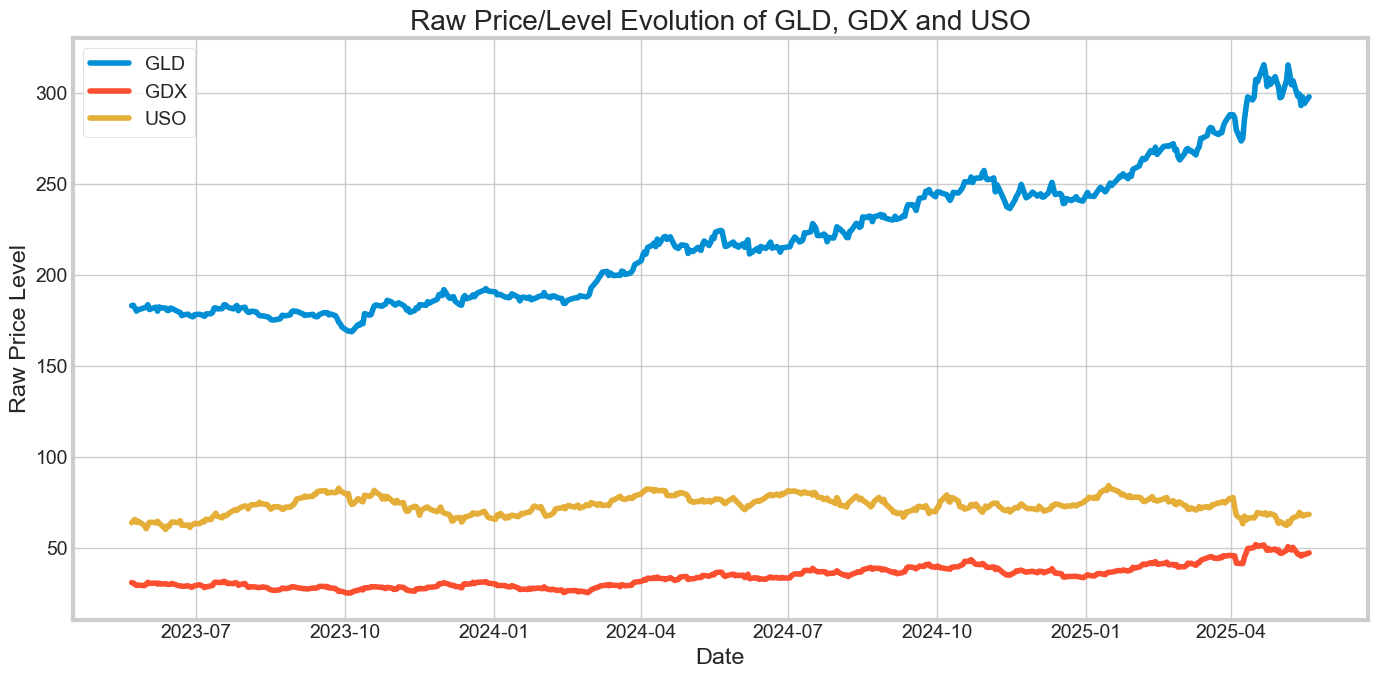

In [5]:
"""
Create a raw price chart showing absolute performance.

This visualization helps identify potential relationships between
assets by showing their actual price movements / levels over time.
"""

plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol], label=symbol)
plt.title('Raw Price/Level Evolution of GLD, GDX and USO')
plt.xlabel('Date')
plt.ylabel('Raw Price Level')
plt.legend()
plt.tight_layout()
plt.show()

Finally we plot the normalized price evolution of all three ETFs over this period by plotting the Normalized Close Price columns below.\
This enables us to view the relative performance of the three ETFs with reference to each other.

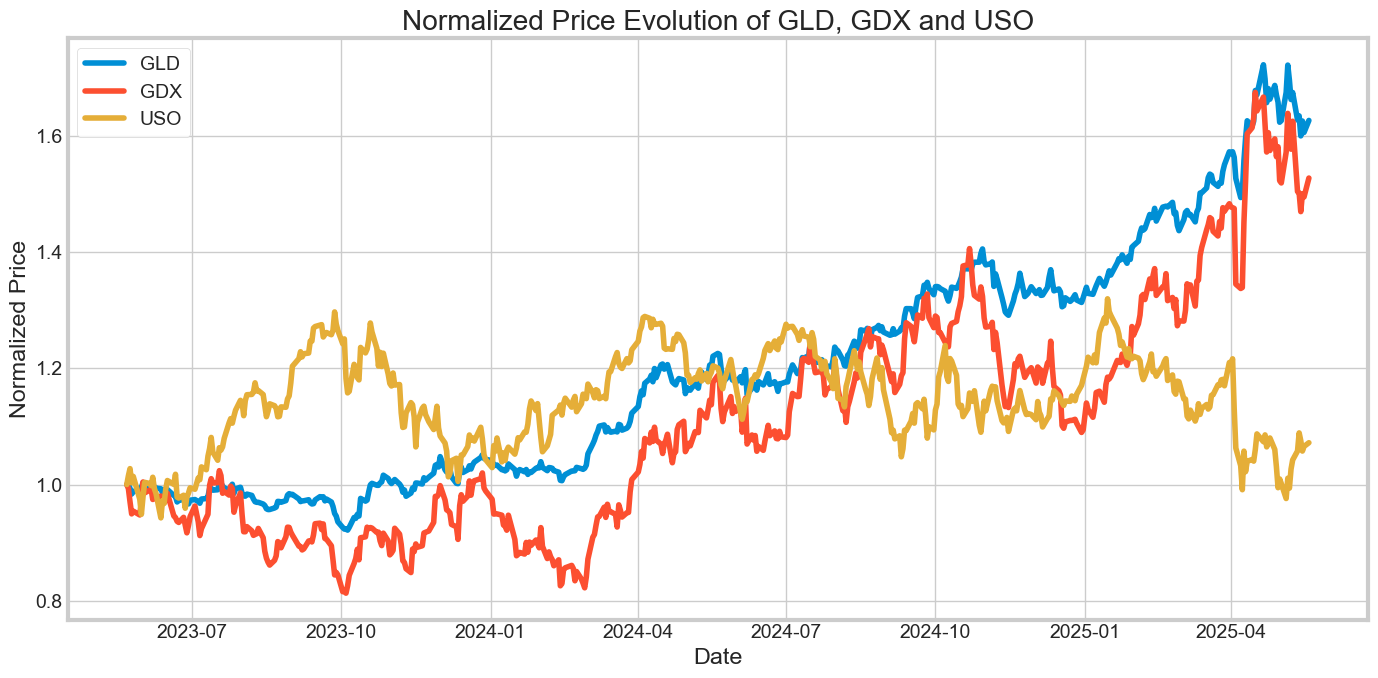

In [6]:
"""
Create a normalized price chart showing relative performance.

This visualization helps identify potential relationships between
assets by showing their normalized price movements over time.
All prices are normalized to start at 1.0 for easy comparison.
"""

plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(data.index, data[symbol]/data[symbol].iloc[0], label=symbol)
plt.title('Normalized Price Evolution of GLD, GDX and USO')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.tight_layout()
plt.show()

## <span style="color:royalblue">  Data Properties </span>
The top 3 rows of the <code>data</code> DataFrame are displayed below:

In [7]:
data.head(3)

,GLD,GDX,USO
Date,,,
2023-05-22,183.210007,30.991301,63.910000
2023-05-23,183.429993,30.777365,64.870003
2023-05-24,181.949997,30.067492,65.660004


The relevant statistical properties of the data are revelaed below.

In [8]:
data.describe()

,GLD,GDX,USO
count,500.000000,500.000000,500.000000
mean,219.220880,34.325367,73.266300
std,37.018799,6.146098,4.983881
min,168.830002,25.195625,60.240002
25%,184.112495,28.854388,69.949999
50%,215.824997,33.766808,73.340000
75%,245.032505,38.362129,76.930000
max,315.589996,51.910000,84.339996


## <span style="color:royalblue"> <u>Part 1: Triplets Trading Strategy for all three ETFs (GDX, GLD, USO)</u> </span>

### <span style="color:royalblue"> [1-A]. Cointegration Analysis </span>

We define a custom function to check for pairwise cointegration across all three ETFs using the CADF test.\
Cointegration is the foundation of statistical arbitrage strategies.\
When two or more assets are cointegrated, their price relationship tends to revert to a long-term equilibrium, creating trading opportunities.

In [9]:
def check_pairwise_cointegration(data, symbols):
    """
    Perform comprehensive cointegration testing on all asset pairs.

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    symbols : list
        List of all asset symbols [GLD, GDX, USO]

    Returns:
    --------
    array-like:
        Pairwise cointegration p-values for all asset pairs
    """

    n = len(symbols)
    results = np.zeros((n, n))
    pvalues = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            # Perform Engle-Granger cointegration test
            score, pvalue, _ = coint(data[symbols[i]], data[symbols[j]])
            results[i, j] = score
            pvalues[i, j] = pvalue

    return pvalues

We invoke the above function and check for pairwise cointegration.

In [10]:
# Check pairwise cointegration
# Lower p-values indicate stronger evidence of cointegration
pvalues = check_pairwise_cointegration(data, symbols)
print("\nPairwise Cointegration p-values:")
for i in range(len(symbols)):
    for j in range(i+1, len(symbols)):
        print(f"{symbols[i]} - {symbols[j]}: {pvalues[i, j]:.4f}")


Pairwise Cointegration p-values:
GLD - GDX: 0.0343
GLD - USO: 0.9935
GDX - USO: 0.9497


On the basis of above p-values, we can conclude the following:

GLD-GDX: This pair is Cointegrated (as p-value is below 0.05)

GLD-USO: This pair is Not cointegrated

GDX-USO: This pair is Not cointegrated

### <span style="color:royalblue">[1-B]. Calculate the spread using a linear combination of all three assets </span>

We'll use the first asset (GLD) as a reference and build a triplet relationship.

We will use a user-defined function employing Multiple Linear Regression (Least Squares) for this purpose.

In [11]:
def calculate_triplet_spread(data, symbols):
    """
    Calculate the spread for triplets trading using linear regression.

    The triplet spread is constructed by finding the linear combination
    of assets that produces a stationary relationship. We use the first
    asset as the dependent variable and regress it against the others.

    Mathematical formulation:
    Spread = GLD - beta₁×GDX - beta₂×USO

    Where beta coefficients are estimated via ordinary least squares.

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    symbols : list
        List of all asset symbols [GLD, GDX, USO]

    Returns:
    --------
    tuple
        (spread, betas)
    """
    # Prepare regression matrices
    # X contains the independent variables (GDX, USO)
    X = data[symbols[1:]].values
    # y contains the dependent variable (GLD)
    y = data[symbols[0]].values

    # Solve the linear regression: y = X*beta + epsilon
    # Using least squares: beta = (X'X)^(-1)X'y
    betas = np.linalg.lstsq(X, y, rcond=None)[0]

    # Calculate the spread (residuals from the regression)
    spread = y - np.dot(X, betas)

    return spread, betas

We use the above function and calculate triplets spread.

In [12]:
spread, betas = calculate_triplet_spread(data, symbols)
print(
f"\nRegr. coefficients: {symbols[1]}:{betas[0]:.4f}, {symbols[2]}:{betas[1]:.4f}"
)


Regr. coefficients: GDX:5.7649, USO:0.2921


We now proceed to check if the spread (as calculated above) is stationary.\
Stationary spread is a necessary condition for mean reversion in pairs trading.

### <span style="color:royalblue"> Necessary Condition: Check for Stationary Spread</span>

In [13]:
# Check if the spread is stationary (key requirement for mean reversion in
# pairs trading)
adf_result = adfuller(spread)
print(f"\nADF test p-value for spread: {adf_result[1]:.4f}")


ADF test p-value for spread: 0.0055


The p-value is less than 0.05 (in fact- it is almost equal to zero), which gives us further confidence that the spread is indeed stationary. This is good for mean reversion.

### <span style="color:royalblue">[1-C].Calculation of Z-score</span>

We employ a user-defined function to calculate the Z-score of this spread.\
The z-score measures how many standard deviations away from the mean a value is.\
In pairs trading, we use this to identify when the spread between two assets has deviated significantly from its historical norm, suggesting a potential mean reversion opportunity.

In [16]:
def calculate_zscore(spread, window=20):
    """
    Calculate rolling z-score for mean reversion analysis.

    Parameters:
    -----------
    spread : array-like
        The spread time series
    window : int
        Rolling window for calculating mean and standard deviation

    Returns:
    --------
    pd.Series
        Rolling z-scores of the input series
    """
    rolling_mean = pd.Series(spread).rolling(window=window).mean()
    rolling_std = pd.Series(spread).rolling(window=window).std()
    z_score = (pd.Series(spread) - rolling_mean) / rolling_std
    return z_score

We apply the above function as shown below.

In [17]:
z_score = calculate_zscore(spread)

### <span style="color:royalblue">[1-D]. Define the triplet trading strategy </span>

Triplet Trading Strategy is defined as indicated in the docstring below.

Initial values of trade params ( entry/exit/stop-loss) are assumed zero for convenience.

The optimal values of these params is determined by parameter optimization, as shown subsequently.

In [18]:
def triplet_trading_strategy(data, z_score, entry_threshold=0.0,
                             exit_threshold=0.0, stop_loss=0.0,
                             lookback_window=20):
    """
    Implement the triplets trading strategy with defined rules.

    Trading Logic:
    - Enter LONG when z-score < -entry_threshold (spread is cheap)
    - Enter SHORT when z-score > +entry_threshold (spread is expensive)
    - Exit positions when z-score crosses exit_threshold
    - Apply stop-loss when z-score exceeds stop_loss level

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    z_score : pd.Series
        Rolling z-scores of the spread
    entry_threshold : float
            Z-score threshold for entering positions (default: 0.0)
    exit_threshold : float
        Z-score threshold for exiting positions (default: 0.0)
    stop_loss : float
        Z-score threshold for stop-loss exits (default: 0.0)
    lookback_window : int
        Rolling window for z-score calculations (default: 20 days)

    Returns:
    --------
    np.array
        Position signals (+1 = long, -1 = short, 0 = flat)
    """
    positions = np.zeros(len(z_score))

    # Initial position: no trade (0)
    for i in range(lookback_window, len(z_score)):
        # If no position is held
        if positions[i-1] == 0:
            # Enter long position on spread
            if z_score[i] < -entry_threshold:
                positions[i] = 1
            # Enter short position on spread
            elif z_score[i] > entry_threshold:
                positions[i] = -1
            # Hold cash
            else:
                positions[i] = 0

        # If currently in a long position on the spread
        elif positions[i-1] == 1:
            # Exit if z-score crosses exit_threshold from below
            if z_score[i] >= exit_threshold:
                positions[i] = 0
            # Stop loss if spread drops further
            elif z_score[i] < -stop_loss:
                positions[i] = 0
            # Maintain position
            else:
                positions[i] = 1

        # If currently in a short position on the spread
        elif positions[i-1] == -1:
            # Exit if z-score crosses exit_threshold from above
            if z_score[i] <= exit_threshold:
                positions[i] = 0
            # Stop loss if spread increases further
            elif z_score[i] > stop_loss:
                positions[i] = 0
            # Maintain position
            else:
                positions[i] = -1

    return positions

We apply the above function to calculate our positions from triplets strategy.

In [19]:
# Implement the strategy
positions = triplet_trading_strategy(data, z_score.values)

### <span style="color:royalblue">[1-E]. Calculate the spread returns</span>

We define a custom function to calculate the spread returns, as follows.

In [20]:
def calculate_spread_returns(spread, positions):
    """
    Calculate spread returns by aligning positions with spread changes.

    Parameters:
    -----------
    spread : array-like
        The spread time series
    positions : array-like
        Position signals from strategy

    Returns:
    --------
    array-like
        spread_returns
    """

    # Calculate daily changes in the spread
    spread_changes = np.diff(spread)

    # Align positions with spread changes
    spread_returns = positions[:-1] * spread_changes

    return spread_returns

We apply the above function to calculate spread returns.

In [21]:
spread_returns = calculate_spread_returns(spread, positions)

### <span style="color:royalblue">[1-F]. Calculate position values for each asset </span>

Next we calculate position values for all the assets under consideration.\
We do this by defining a custom function as shown below.

In [22]:
def calculate_position_values(data, symbols, positions, betas):

    """
    Calculate position values for all assets under study.

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    symbols : list
        List of all asset symbols [GLD, GDX, USO]
    positions : array-like
        Position signals from strategy
    betas : array-like
        Regression coefficients for position sizing

    Returns:
    --------
    pd.DataFrame
         Position values for all assets under study
    """

    position_values = pd.DataFrame(index=data.index[1:], columns=symbols)

    # Position in the first asset (reference)
    position_values[symbols[0]] = -positions[:-1]

    # Positions in other assets based on betas
    for i, symbol in enumerate(symbols[1:]):
        position_values[symbol] = positions[:-1] * betas[i]

    return position_values

We calculate the position values, as shown below by calling the above function.

In [23]:
position_values = calculate_position_values(data, symbols, positions, betas)

### <span style="color:royalblue">[1-G]. Calculate strategy P&L </span>

Now we calculate the strategy returns from position values.\
For this we define a custom function, as shown below.

In [24]:
def calculate_strategy_pnl(data, position_values):
    """
    Calculate detailed strategy returns from position values.

    This method translates the calculated position values into actual asset
    positions and calculates the resulting profit and loss.

    Position Construction:
    - Long spread = Short GLD, Long GDX*β₁, Long USO*β₂
    - Short spread = Long GLD, Short GDX*β₁, Short USO*β₂

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    position_values : array-like
        Position signals from strategy

    Returns:
    --------
    tuple
        (daily_pnl, cumulative_pnl)
    """
    # Calculate daily returns for each asset
    asset_returns = data.pct_change().iloc[1:]

    # Calculate daily P&L as the dot product of positions and returns
    daily_pnl = (position_values * asset_returns).sum(axis=1)

    # Calculate cumulative P&L
    cumulative_pnl = daily_pnl.cumsum()

    return daily_pnl, cumulative_pnl

Now we can calculate daily returns and cumulative returns, as shown below.

In [25]:
daily_pnl, cumulative_pnl = calculate_strategy_pnl(data, position_values)

### <span style="color:royalblue">[1-H]. Calculate strategy metrics </span>

Risk-free rate is assumed to be 3% p.a.
We define a function to calculate the key metrics for triplets strategy.

In [26]:
def calculate_metrics(returns, risk_free_rate=0.03/252):
    """
    Calculate comprehensive performance metrics for the triplets strategy.

    This method computes industry-standard metrics used to evaluate
    trading strategies, including risk-adjusted returns, drawdown
    analysis, and trading efficiency measures.

    Parameters:
    -----------
    returns : pd.Series
        Daily triplets strategy returns
    risk_free_rate : float
        Daily risk free rate (assuming 252 trading days in a year)

    Returns:
    --------
    dict
        Dictionary containing all performance metrics
    """

    # Total Return
    total_return = returns.sum()

    # Annualized Return
    annualized_return = returns.mean() * 252

    # Volatility (annualized)
    volatility = returns.std() * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = (
        annualized_return - risk_free_rate
        ) / volatility if volatility > 0 else 0

    # Sortino Ratio - only considers downside volatility
    downside_returns = returns.copy()
    downside_returns[downside_returns > 0] = 0
    downside_volatility = downside_returns.std() * np.sqrt(252)
    sortino_ratio = (
        annualized_return - risk_free_rate
        ) / downside_volatility if downside_volatility > 0 else 0

    # Maximum Drawdown
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding().max()
    drawdown = (cumulative / peak - 1)
    max_drawdown = drawdown.min()

    # Calmar Ratio
    calmar_ratio = annualized_return / abs(
        max_drawdown
        ) if max_drawdown != 0 else 0

    # Win Rate
    trades = returns[returns != 0]
    win_rate = len(trades[trades > 0]) / len(trades) if len(trades) > 0 else 0

    # Profit Factor
    gross_profits = returns[returns > 0].sum()
    gross_losses = abs(returns[returns < 0].sum())
    profit_factor = gross_profits / gross_losses \
    if gross_losses != 0 else float('inf')

    # Average Profit per Trade
    avg_profit = trades.mean() if len(trades) > 0 else 0

    # Number of Trades
    num_trades = len(np.where(np.diff(positions) != 0)[0])

    metrics = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Volatility (annualized)': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown': max_drawdown,
        'Calmar Ratio': calmar_ratio,
        'Win Rate': win_rate,
        'Profit Factor': profit_factor,
        'Average Profit per Trade': avg_profit,
        'Number of Trades': num_trades,
    }

    return metrics

We invoke the above function, to derive the metrics.

In [27]:
strategy_metrics = calculate_metrics(daily_pnl)

We print the metrics to examine them closely.

In [28]:
### Print the metrics
print("\nStrategy Performance Metrics:")
for metric, value in strategy_metrics.items():
    if metric in ['Win Rate']:
        print(f"{metric}: {value:.2%}")
    elif metric in ['Total Return', 'Max Drawdown']:
        print(f"{metric}: {value:.2%}")
    elif 'Ratio' in metric or 'Factor' in metric:
        print(f"{metric}: {value:.2f}")
    elif metric == 'Number of Trades':
        print(f"{metric}: {int(value)}")
    else:
        print(f"{metric}: {value:.4f}")


Strategy Performance Metrics:
Total Return: 197.52%
Annualized Return: 0.9975
Volatility (annualized): 1.2503
Sharpe Ratio: 0.80
Sortino Ratio: 1.20
Max Drawdown: -80.03%
Calmar Ratio: 1.25
Win Rate: 54.58%
Profit Factor: 1.21
Average Profit per Trade: 0.0082
Number of Trades: 480


It is clear from the above metrics that there seems to be some level of over-trading prevalent (with 480 trades in 2 years period).\
Also the drawdowns seem quite high and the win rate could be improved further.\
We will proceed to further optimize the stop/entry/exit parameters below.

### <span style="color:royalblue">[1-I]. Visualize the Results </span>

Here we define a custom function to depict the results of Triplets strategy in a visually appealing format.

In [29]:
def visualize_results(data, z_score, positions, cumulative_pnl):
    """
    Create comprehensive visualizations of strategy performance.

    This method generates a multi-panel chart showing:
    1. Normalized asset prices over time
    2. Z-score evolution with trading signals
    3. Cumulative profit and loss

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    z_score : pd.Series
        Rolling z-scores of the spread
    positions : array-like
        Position signals
    cumulative_pnl : pd.Series
        Cumulative strategy returns
    """
    fig, axs = plt.subplots(3, 1, figsize=(14, 18),
                            gridspec_kw={'height_ratios': [2, 1, 2]})

    # Panel 1: Asset Price Evolution
    for symbol in symbols:
        axs[0].plot(
            data.index, data[symbol]/data[symbol].iloc[0], label=symbol
        )
    axs[0].set_title('Normalized Asset Prices Evolution')
    axs[0].set_ylabel('Normalized Price')
    axs[0].legend()

    # Panel 2: Z-Score and Trading Signals
    axs[1].plot(data.index[20:], z_score[20:], color='blue', alpha=0.5)
    axs[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[1].axhline(y=2, color='red', linestyle='--', alpha=0.3)
    axs[1].axhline(y=-2, color='green', linestyle='--', alpha=0.3)

    # Overlay positions (buy/sell signals)
    buy_signals = np.where(np.diff(np.append(0, positions)) > 0)[0]
    sell_signals = np.where(np.diff(np.append(0, positions)) < 0)[0]

    if len(buy_signals) > 0:
        axs[1].scatter(data.index[buy_signals], z_score[buy_signals],
                       color='green', marker='^', s=100, label='Buy Signal')
    if len(sell_signals) > 0:
        axs[1].scatter(data.index[sell_signals], z_score[sell_signals],
                       color='red', marker='v', s=100, label='Sell Signal')

    axs[1].set_title('Spread Z-score and Trading Signals')
    axs[1].set_ylabel('Z-score')
    axs[1].legend()

    # Panel 3: Cumulative Performance
    axs[2].plot(cumulative_pnl.index, cumulative_pnl, color='blue')
    axs[2].fill_between(cumulative_pnl.index, cumulative_pnl, 0, alpha=0.2,
                        color='blue')
    axs[2].set_title('Cumulative Triplets Strategy Performance')
    axs[2].set_ylabel('Cumulative P&L')
    axs[2].set_xlabel('Date')

    plt.tight_layout()
    plt.show()

We visualize the results as follows.

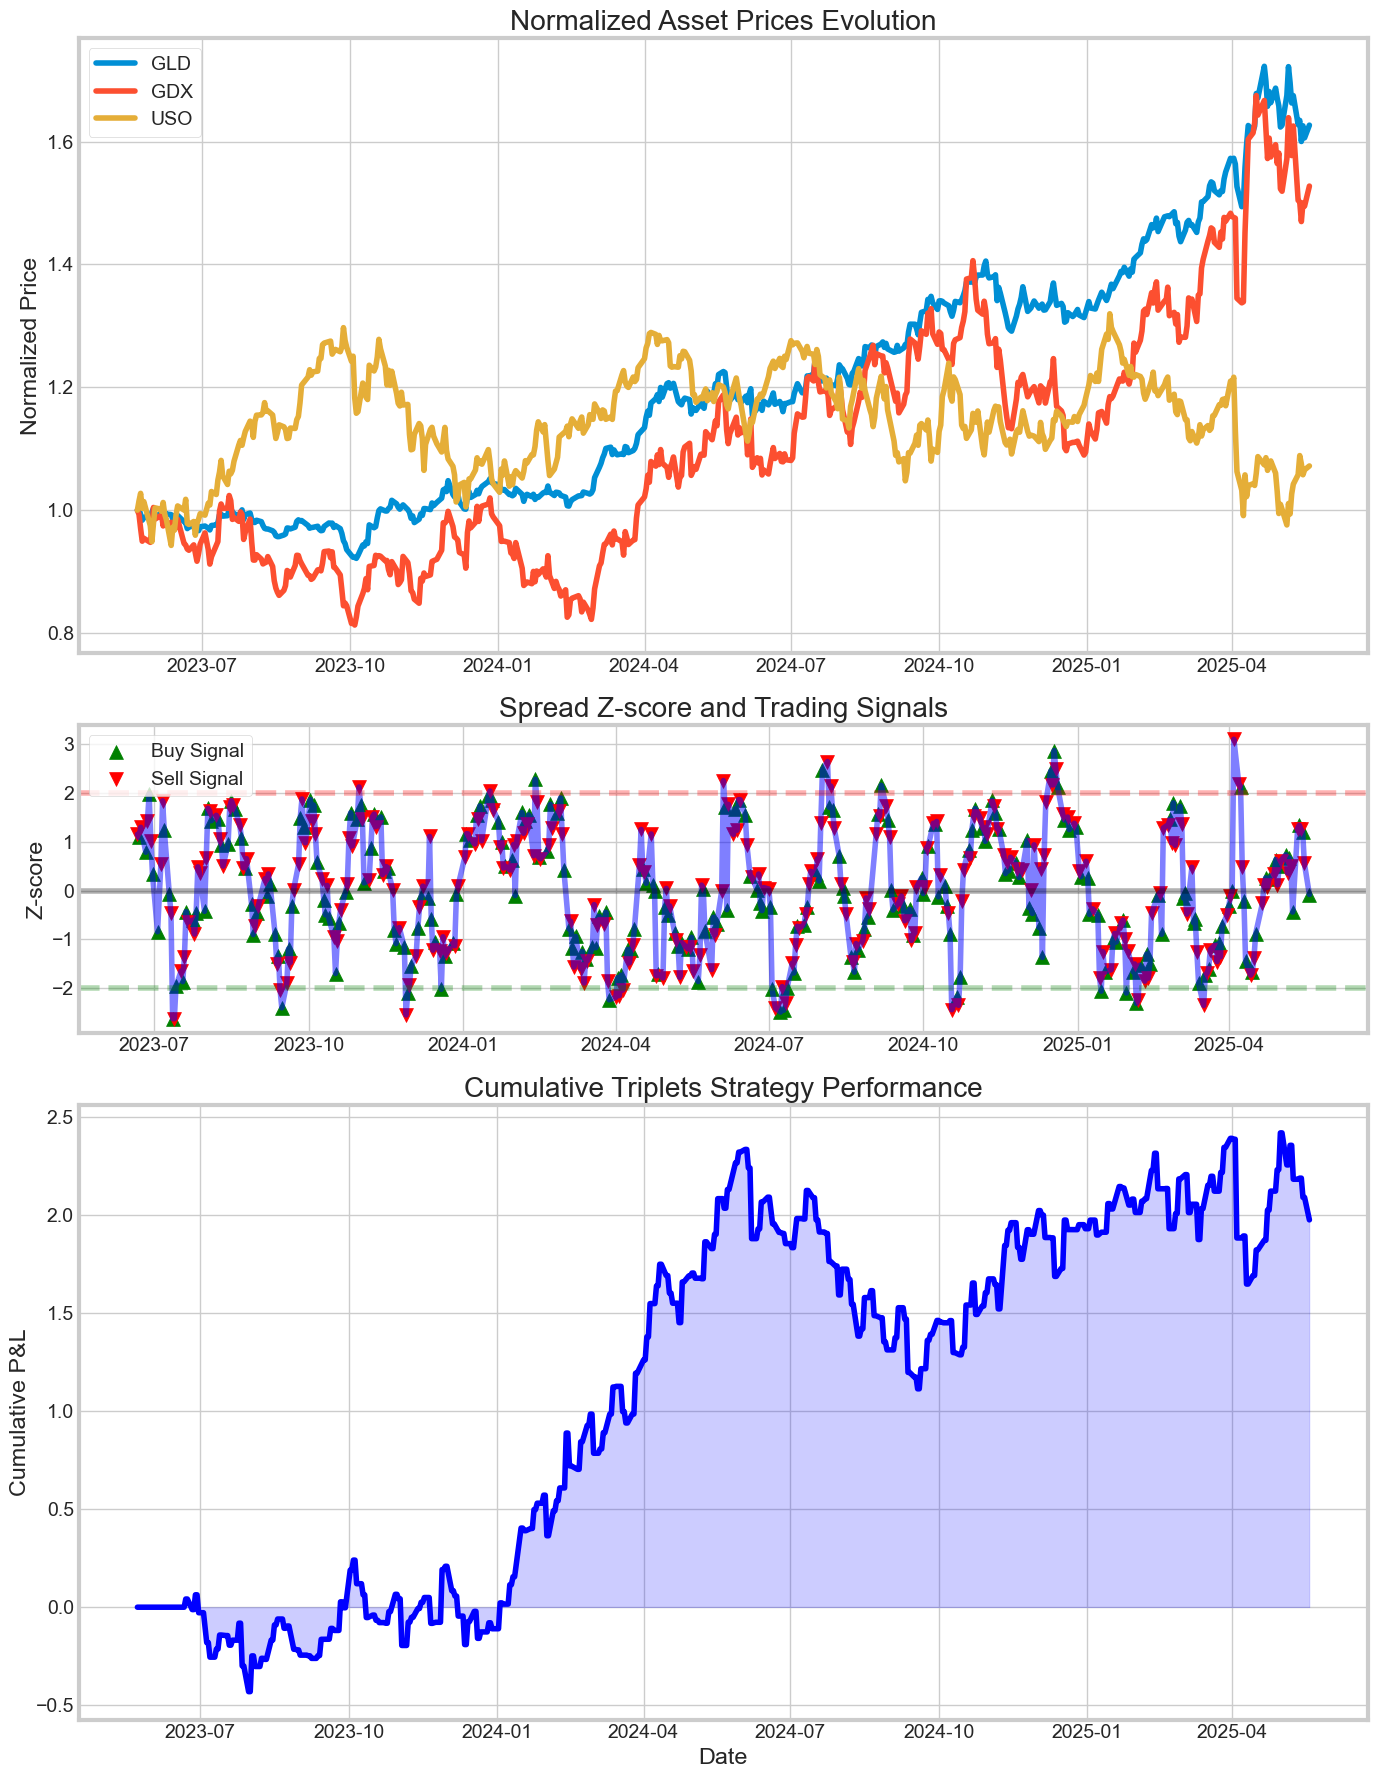

In [30]:
# Visualize the results
visualize_results(data, z_score, positions, cumulative_pnl)

### <span style="color:royalblue">[1-J]. Correlation Analysis</span>

Here we calculate the correlations between the assets and examine the statistical properties.

In [31]:
correlations = data.pct_change().corr()
print("\nCorrelation Matrix:")
print(correlations)


Correlation Matrix:
          GLD       GDX       USO
GLD  1.000000  0.805243  0.219075
GDX  0.805243  1.000000  0.195759
USO  0.219075  0.195759  1.000000


We note the high positive correlation (0.8052) between GLD and GDX.\
We also note the relatively low positive correlation between GLD-USO (0.2190) and GDX-USO (0.1957)

### <span style="color:royalblue">[1-K]. Strategy sensitivity analysis</span>

We run a simple parameter optimization (using grid search approach) to determine the optimal values of the trade entry, stop-loss and trade exit parameters.

In [33]:
def analyze_parameter_sensitivity(data, symbols, params_range):
    """
    Sensitivity analysis (via grid search) of Stop/Entry/Exit parameters
    for triplets strategy.

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    symbols : list
        List of all asset symbols [GLD, GDX, USO]
    params_range: Dictionary
        Range of specified parameters for testing Stop/Entry/Exit levels

    Returns:
    --------
    pd.DataFrame
        Optimization (grid search) results
    """

    results = []

    X = data[symbols[1:]].values
    y = data[symbols[0]].values
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    spread = y - np.dot(X, beta)
    z_score = calculate_zscore(spread)

    for entry in params_range['entry']:
        for exit in params_range['exit']:
            for stop in params_range['stop']:
                positions = triplet_trading_strategy(
                    data, z_score.values, entry_threshold=entry,
                    exit_threshold=exit,stop_loss=stop
                )

                spread_returns = calculate_spread_returns(spread, positions)

                position_values = pd.DataFrame(
                    index=data.index[1:], columns=symbols)
                position_values[symbols[0]] = -positions[:-1]
                for i, symbol in enumerate(symbols[1:]):
                    position_values[symbol] = positions[:-1] * beta[i]

                asset_returns = data.pct_change().iloc[1:]
                daily_pnl = (position_values * asset_returns).sum(axis=1)

                metrics = calculate_metrics(daily_pnl)
                metrics['Entry Threshold'] = entry
                metrics['Exit Threshold'] = exit
                metrics['Stop Loss'] = stop

                results.append(metrics)

    return pd.DataFrame(results)

Next we define the parameter ranges for our sensitivity analysis and optimization.

In [34]:
# Define parameter ranges for sensitivity analysis
params_range = {
    'entry': list(np.arange(0.0, 5.0, 0.5)),
    'exit': list(np.arange(0.0, 2.0, 0.2)),
    'stop': list(np.arange(0.0, 5.0, 0.5))
}

It's worth noting that we are testing a total of 1000 ( ==10 x 10 x 10 ) parameter combinations.\
Next we run the parameter sensitivity analysis and obtain the results.\
This step can be potentially computation-intensive (and therefore time consuming), depending on the parameter ranges specified.

In [35]:
# Run parameter sensitivity analysis
sensitivity_results = analyze_parameter_sensitivity(
    data, symbols, params_range
)

Now it's possible to determine the optimal parameters for our Triplets strategy.

In [36]:
# Find optimal parameters
optimal_params = sensitivity_results.sort_values(
    'Sharpe Ratio', ascending=False).iloc[0]
print("\nOptimal Strategy Parameters:")
print(f"Entry Threshold: {optimal_params['Entry Threshold']:.1f}")
print(f"Exit Threshold: {optimal_params['Exit Threshold']:.1f}")
print(f"Stop Loss: {optimal_params['Stop Loss']:.1f}")
print(f"Resulting Sharpe Ratio: {optimal_params['Sharpe Ratio']:.2f}")
print(f"Resulting Sortino Ratio: {optimal_params['Sortino Ratio']:.2f}")


Optimal Strategy Parameters:
Entry Threshold: 2.5
Exit Threshold: 1.0
Stop Loss: 2.0
Resulting Sharpe Ratio: 0.86
Resulting Sortino Ratio: 2.76


### <span style="color:royalblue">[1-L]. Analyze drawdowns periods</span>

Here we define and analyze the drawdowns produced by triplets strategy.\
We do this by defining a custom function for this purpose.

In [37]:
def analyze_drawdowns(returns, top_n=3):
    """
    Defining and analyzing drawdowns produced by the triplets strategy.

    Parameters:
    -----------
    returns : pd.Series
        Series of triplets strategy pnl
    top_n : int
        Number of drawdown periods for study (in ascending order of DD value)

    Returns:
    --------
    list
        List of top 'n' drawdown periods
    """
    # Calculate cumulative returns
    cum_returns = (1 + returns).cumprod()

    # Calculate drawdowns
    peak = cum_returns.expanding().max()
    drawdown = (cum_returns / peak - 1)

    # Find drawdown periods
    is_in_drawdown = drawdown < 0

    # Identify drawdown periods
    drawdown_periods = []
    start_idx = None

    for i in range(len(drawdown)):
        if is_in_drawdown.iloc[i] and start_idx is None:
            start_idx = i
        elif not is_in_drawdown.iloc[i] and start_idx is not None:
            end_idx = i - 1
            drawdown_value = drawdown.iloc[start_idx:end_idx+1].min()
            duration = end_idx - start_idx + 1
            drawdown_periods.append({
                'start_date': drawdown.index[start_idx],
                'end_date': drawdown.index[end_idx],
                'max_drawdown': drawdown_value,
                'duration': duration
            })
            start_idx = None

    # If still in drawdown at the end of the period
    if start_idx is not None:
        end_idx = len(drawdown) - 1
        drawdown_value = drawdown.iloc[start_idx:end_idx+1].min()
        duration = end_idx - start_idx + 1
        drawdown_periods.append({
            'start_date': drawdown.index[start_idx],
            'end_date': drawdown.index[end_idx],
            'max_drawdown': drawdown_value,
            'duration': duration
        })

    # Sort by max drawdown (ascending)
    drawdown_periods.sort(key=lambda x: x['max_drawdown'])

    return drawdown_periods[:top_n]

We now invoke this custom function to study the drawdowns.

In [38]:
# Analyze top drawdown periods
top_drawdowns = analyze_drawdowns(daily_pnl)
print("\nTop 3 Drawdown Periods:")
for i, dd in enumerate(top_drawdowns):
    print(
    f"{i+1}. {dd['start_date'].strftime('%Y-%m-%d')} to {dd['end_date'].strftime('%Y-%m-%d')}"
    )
    print(f"   Max Drawdown: {dd['max_drawdown']:.2%}")
    print(f"   Duration: {dd['duration']} trading days")


Top 3 Drawdown Periods:
1. 2024-06-05 to 2025-05-19
   Max Drawdown: -80.03%
   Duration: 239 trading days
2. 2023-10-06 to 2024-01-23
   Max Drawdown: -43.03%
   Duration: 74 trading days
3. 2023-06-30 to 2023-10-03
   Max Drawdown: -42.87%
   Duration: 66 trading days


We note that this simple triplet trading strategy seems to have larger drawdowns, with longer time to recovery, implying higher than desirable volatility.

We will proceed to compare this basic triplets strategy with a suitable benchmark- namely an equally weighted protfolio comprising equal weights in each of the three constituent ETFs (namely GLD, GDX, USO)

### <span style="color:royalblue">[1-M]. Compare strategy performance to a benchmark (Equal-weight portfolio)</span>

Here we compare the triplets strategy to a suitable benchmark- namely, a simple equal-weighted portfolio comprising our three assets (GLD, GDX, USO).

In [39]:
def compare_to_benchmark(data, daily_pnl):
    """
    Compare triplets strategy performance to a simple equal-weight portfolio.

    Parameters:
    -----------
    data : pd.DataFrame
        Input DataFrame of assets with prices
    daily_pnl : pd.Series
        Daily strategy returns

    Returns:
    -----------
    pd.DataFrame
        Comparison metrics (with respect to the chosen benchmark)
    """
    # Calculate equal-weight portfolio returns
    eq_weight_returns = data.pct_change().mean(axis=1).iloc[1:]
    eq_weight_cumulative = (1 + eq_weight_returns).cumprod()

    # Calculate strategy cumulative returns
    strategy_cumulative = (1 + daily_pnl).cumprod()

    # Calculate metrics for both
    strategy_metrics = calculate_metrics(daily_pnl)
    benchmark_metrics = calculate_metrics(eq_weight_returns)

    # Plot comparison
    plt.figure(figsize=(14, 7))
    plt.plot(strategy_cumulative.index, strategy_cumulative,
             label='Triplets Strategy')
    plt.plot(eq_weight_cumulative.index, eq_weight_cumulative,
             label='Equal-Weight Portfolio')
    plt.title('Triplets Strategy vs. Benchmark Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print comparison metrics
    comparison = pd.DataFrame({
        'Triplets Strategy': [
            f"{strategy_metrics['Annualized Return']:.2%}",
            f"{strategy_metrics['Volatility (annualized)']:.2%}",
            f"{strategy_metrics['Sharpe Ratio']:.2f}",
            f"{strategy_metrics['Max Drawdown']:.2%}",
            f"{strategy_metrics['Win Rate']:.2%}"
        ],
        'Equal-Weight Benchmark': [
            f"{benchmark_metrics['Annualized Return']:.2%}",
            f"{benchmark_metrics['Volatility (annualized)']:.2%}",
            f"{benchmark_metrics['Sharpe Ratio']:.2f}",
            f"{benchmark_metrics['Max Drawdown']:.2%}",
            f"{benchmark_metrics['Win Rate']:.2%}"
        ]
    }, index=['Annualized Return', 'Volatility', 'Sharpe Ratio',
              'Max Drawdown', 'Win Rate'])

    return comparison

Comparing to the benchmark, as defined above.

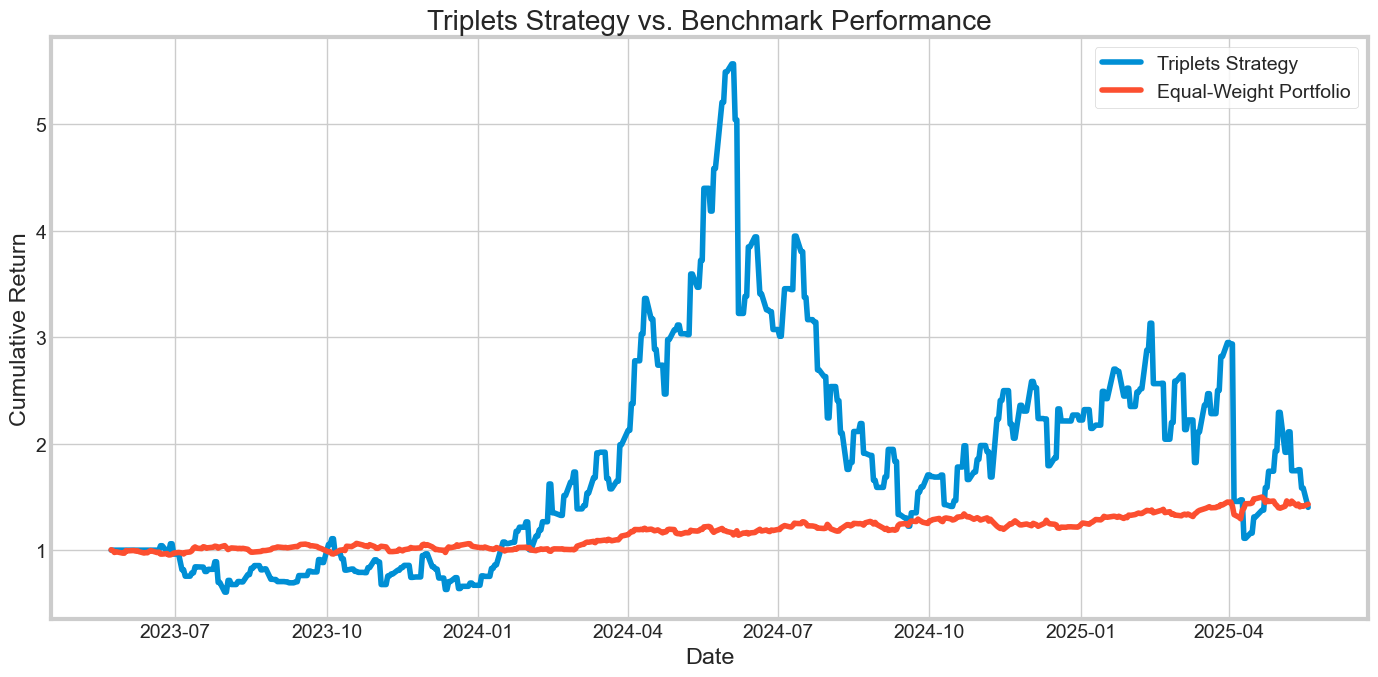


Triplets Strategy vs. Benchmark Comparison:
                  Triplets Strategy Equal-Weight Benchmark
Annualized Return            99.75%                 20.05%
Volatility                  125.03%                 19.72%
Sharpe Ratio                   0.80                   1.02
Max Drawdown                -80.03%                -10.86%
Win Rate                     54.58%                 51.70%


In [40]:
# Compare to benchmark
benchmark_comparison = compare_to_benchmark(data, daily_pnl)
print("\nTriplets Strategy vs. Benchmark Comparison:")
print(benchmark_comparison)

As noted earlier, the triplets strategy appears to sometimes underperform the equal-weighted benchmark.\
The triplets strategy suffers from much higher volatility than benchmark, without any significant outperformance.\
The triplets strategy suffers from lower risk-adjusted returns (as seen from its lower Sharpe Ratio than benchmark).\
The triplets strategy's marginally higher win rate is offset by its much higher drawdown (vs. benchmark).

### <span style="color:royalblue">[1-N]. Final Triplets Strategy Summary</span>

In [41]:
# 15. Final strategy summary
print("\n=== Final Triplets Trading Strategy Summary ===")
print(f"Assets: {', '.join(symbols)}")
print(
f"Period:{data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}"
)
print(
f"Regression coefficients:{symbols[1]}: {betas[0]:.4f}, {symbols[2]}: {betas[1]:.4f}"
)
print(f"Entry threshold: {optimal_params['Entry Threshold']:.1f}")
print(f"Exit threshold: {optimal_params['Exit Threshold']:.1f}")
print(f"Stop loss: {optimal_params['Stop Loss']:.1f}")
print(f"Sharpe ratio: {optimal_params['Sharpe Ratio']:.2f}")
print(f"Total return: {strategy_metrics['Total Return']:.2%}")
print(f"Number of trades: {int(strategy_metrics['Number of Trades'])}")
print(f"Win rate: {strategy_metrics['Win Rate']:.2%}")


=== Final Triplets Trading Strategy Summary ===
Assets: GLD, GDX, USO
Period:2023-05-22 to 2025-05-19
Regression coefficients:GDX: 5.7649, USO: 0.2921
Entry threshold: 2.5
Exit threshold: 1.0
Stop loss: 2.0
Sharpe ratio: 0.86
Total return: 197.52%
Number of trades: 480
Win rate: 54.58%


Thus we note that our triplets strategy appears to leave some room for improvement- especially with regard to its higher than desirable levels of overtrading and sub-optimal Sharpe ratio.

## <span style="color:royalblue"><u>Part 2: GLD-GDX Pairs Trading with USO Filter</u> </span>

### <span style="color:royalblue">[2-A]. Analyze the GLD-GDX pair relationship</span>

Here we define a custom function for analyzing a simple (conventional) pairs trading strategy for GLD and GDX.

In [42]:
def analyze_pairs_trading(data, symbols, lookback_window=20):
    """
    Analyze a simple convestional pairs trading strategy for GLD and GDX.

    Parameters:
    -----------
    data : pd.DataFrame
        Price data for all assets
    symbols : list
        List of all asset symbols [GLD, GDX, USO]
    lookback_window : int
        Rolling window for z-score calculations (default: 20 days)

    Returns:
    --------
    tuple
        (pair_data, pair_spread, z_score, hedge_ratio)
    """

    # Extract the pair
    pair_data = data[symbols[:2]].copy()

    # Check for cointegration
    score, pvalue, _ = coint(pair_data[symbols[0]], pair_data[symbols[1]])
    print(f"Cointegration p-value for {symbols[0]}-{symbols[1]}: {pvalue:.4f}")

    # Calculate the hedge ratio using linear regression
    model = np.polyfit(pair_data[symbols[1]], pair_data[symbols[0]], 1)
    hedge_ratio = model[0]
    print(f"Hedge ratio: {hedge_ratio:.4f}")

    # Calculate the spread for GLD-GDX pair
    pair_spread = pair_data[symbols[0]] - hedge_ratio * pair_data[symbols[1]]

    # Test for stationarity
    adf_result = adfuller(pair_spread)
    print(f"ADF test p-value for spread: {adf_result[1]:.4f}")

    # Calculate z-score
    z_score = calculate_zscore(pair_spread, window=lookback_window)

    return pair_data, pair_spread, z_score, hedge_ratio

We invoke the custom function to get the relevant metrics for the GLD-GDX pair.

In [43]:
# Analyze GLD-GDX pair
pair_data, pair_spread, z_score, hedge_ratio = analyze_pairs_trading(
    data, symbols, lookback_window=20
)

Cointegration p-value for GLD-GDX: 0.0343
Hedge ratio: 5.8145
ADF test p-value for spread: 0.0086


Thus we observe that the ETF pair GLD-GDX appears to be cointegrated (at 95% CL), as p-value is less than 0.05.\
The ADF test p-value for the spread between GLD-GDX is also very nearly equal to zero; which further reinforces our earlier conclusion that this spread is also stationary.

### <span style="color:royalblue">[2-B]. Define and Run the Filtered Pairs Strategy </span>

Implementation of pairs trading strategy with introduction of USO volatility filter.\
Herein we define a helper function which will enable us to define and run the filtered pairs strategy.

In [44]:
def run_filtered_pairs_strategy(pair_data, pair_symbols, pair_spread, z_score,
                                uso_filter, entry_threshold=0.0,
                                exit_threshold=0.0, stop_loss=0.0):

    """
    Execute a pairs trading strategy with an external market filter.

    This strategy trades the mean reversion of a spread between two assets,
    but only when an external filter condition is met. The filter helps
    avoid trading during unfavorable market regimes.

    Parameters:
    -----------
    pair_data : pandas.DataFrame
        Price data for the trading pair
    pair_symbols : list
        List of trading symbols, namely ["GLD", "GDX"]
    pair_spread : pandas.Series
        GLD-GDX spread
    z_score : pandas.Series
        Z-score of the spread for signal generation
    uso_filter : pandas.Series (boolean)
        External USO filter - True means trading is allowed
    entry_threshold : float
        Z-score threshold for entering positions (default: 0.0)
    exit_threshold : float
        Z-score threshold for exiting positions (default: 0.0)
    stop_loss : float
        Z-score threshold for stop-loss exits (default: 0.0)

    Returns:
    --------
    pandas.Series
        Daily strategy returns series
    """

    # Initialize positions
    positions_pair = np.zeros(len(z_score))

    # Apply trading rules with USO filter
    for i in range(20, len(z_score)):
        # Only trade if USO filter allows (and we have enough data points)
        if i < len(uso_filter) and uso_filter.iloc[i]:
            # If no position is held
            if positions_pair[i-1] == 0:
                # Enter long position on spread
                if z_score[i] < -entry_threshold:
                    positions_pair[i] = 1
                # Enter short position on spread
                elif z_score[i] > entry_threshold:
                    positions_pair[i] = -1
                # Hold cash
                else:
                    positions_pair[i] = 0

            # If currently in a long position on the spread
            elif positions_pair[i-1] == 1:
                # Exit if z-score crosses exit_threshold from below
                if z_score[i] >= exit_threshold:
                    positions_pair[i] = 0
                # Stop loss if spread drops further
                elif z_score[i] < -stop_loss:
                    positions_pair[i] = 0
                # Maintain position
                else:
                    positions_pair[i] = 1

            # If currently in a short position on the spread
            elif positions_pair[i-1] == -1:
                # Exit if z-score crosses exit_threshold from above
                if z_score[i] <= exit_threshold:
                    positions_pair[i] = 0
                # Stop loss if spread increases further
                elif z_score[i] > stop_loss:
                    positions_pair[i] = 0
                # Maintain position
                else:
                    positions_pair[i] = -1
        else:
            # No trading when USO filter is triggered - flat position
            positions_pair[i] = 0

    #return positions

    # Calculate returns
    # Calculate daily changes in the spread
    spread_changes = pair_spread.pct_change().shift(-1).iloc[:-1]

    # Align positions with spread changes
    strategy_returns = pd.Series(
        positions_pair[:-1], index=spread_changes.index
        ) * spread_changes
    pd.Series(positions_pair).to_csv("filtered_pairs_positions.csv")

    return strategy_returns


### <span style="color:royalblue">[2-C].Optimizing USO Volatility Threshold (using helper funtion)</span>

We run the filtered pairs strategy with optimal USO vol filter threshold as shown herein below.\
We test multiple different vol thresholds (defined earlier) and get the metrics of the most optimal filtered pairs strategy.

In [45]:
def optimize_uso_threshold(data, symbols, pair_spread, z_score):
    """
    Find the optimal USO volatility threshold for filtering trades.

    This function tests different USO volatility thresholds to determine
    which level provides the best risk-adjusted returns for the pairs
    trading strategy. The idea is that high oil volatility periods may
    indicate market stress that reduces the effectiveness of pairs trading.

    Parameters:
    -----------
    data : pandas.DataFrame
        Price data for all assets
    symbols : list
        List of asset symbols [GLD, GDX, USO]
    pair_spread : pandas.Series
        GLD-GDX spread
    z_score : pandas.Series
        Z-score of the spread

    Returns:
    --------
    tuple
        (optimization_results_df, uso_volatility_series, uso_filter_series,
        optimal_threshold)
    """
    print(f"\n--- Optimizing USO Volatility Threshold ---")

    # Calculate USO volatility as our filter variable
    uso = data[symbols[2]].copy()
    uso_returns = uso.pct_change().dropna()
    uso_volatility = uso_returns.rolling(window=20).std()

    print(f"USO volatility statistics:")
    print(f"Mean: {uso_volatility.mean():.6f}")
    print(f"Std: {uso_volatility.std():.6f}")
    print(f"Min: {uso_volatility.min():.6f}")
    print(f"Max: {uso_volatility.max():.6f}")

    # Test various percentile thresholds
    # Lower percentiles mean stricter filtering (less trading)
    percentiles = [30, 40, 50, 60, 70, 75, 80, 85, 90, 95]
    thresholds = [np.percentile(uso_volatility.dropna(), p)
                 for p in percentiles]

    optimization_results = []

    print(f"\nTesting {len(thresholds)} different volatility thresholds...")

    for i, (percentile, threshold) in enumerate(zip(percentiles, thresholds)):
        # Create filter: trade only when USO volatility is below threshold
        uso_filter = uso_volatility < threshold

        # Run strategy with this filter
        strategy_returns = run_filtered_pairs_strategy(
            data[symbols[0]], data[symbols[1]], pair_spread, z_score, uso_filter
        )

        # Calculate performance metrics
        metrics = calculate_metrics(strategy_returns)
        metrics['Threshold'] = threshold
        metrics['Percentile'] = percentile
        metrics['Trade_Days'] = len(strategy_returns[strategy_returns != 0])

        optimization_results.append(metrics)

        print(f"Threshold {i+1}/{len(thresholds)}: "
              f"{percentile}th percentile ({threshold:.6f}) - "
              f"Sharpe: {metrics['Sharpe Ratio']:.2f}")

    # Convert to DataFrame for analysis
    results_df = pd.DataFrame(optimization_results)

    # Find optimal threshold based on Sharpe ratio
    optimal_idx = results_df['Sharpe Ratio'].idxmax()
    optimal_result = results_df.iloc[optimal_idx]

    print(f"\n--- Optimal Threshold Results ---")
    print(f"Best percentile: {optimal_result['Percentile']:.0f}th")
    print(f"Threshold value: {optimal_result['Threshold']:.6f}")
    print(f"Sharpe Ratio: {optimal_result['Sharpe Ratio']:.3f}")
    print(f"Sortino Ratio: {optimal_result['Sortino Ratio']:.3f}")
    print(f"Win Rate: {optimal_result['Win Rate']:.2%}")
    print(f"Trading days: {optimal_result['Trade_Days']:.0f}")

    return results_df, uso_volatility, uso_filter, optimal_result

We invoke the helper function defined above.

In [46]:
optimization_results, uso_volatility, uso_filter, optimal_threshold = \
optimize_uso_threshold(
    data, symbols, pair_spread, z_score
)

# Display optimization results
print(f"\nOptimization Results Summary:")
print("-" * 40)
best_results = optimization_results.nlargest(3, 'Sharpe Ratio')
for i, (idx, row) in enumerate(best_results.iterrows()):
    print(f"Rank {i+1}: {row['Percentile']:.0f}th percentile "
          f"(Sharpe: {row['Sharpe Ratio']:.3f}, "
          f"Trades: {row['Trade_Days']:.0f})")


--- Optimizing USO Volatility Threshold ---
USO volatility statistics:
Mean: 0.017451
Std: 0.005193
Min: 0.009146
Max: 0.032346

Testing 10 different volatility thresholds...
Threshold 1/10: 30th percentile (0.013600) - Sharpe: 1.27
Threshold 2/10: 40th percentile (0.015474) - Sharpe: 1.06
Threshold 3/10: 50th percentile (0.016962) - Sharpe: 0.80
Threshold 4/10: 60th percentile (0.018739) - Sharpe: 0.73
Threshold 5/10: 70th percentile (0.020575) - Sharpe: 0.23
Threshold 6/10: 75th percentile (0.021287) - Sharpe: 0.35
Threshold 7/10: 80th percentile (0.021912) - Sharpe: 0.74
Threshold 8/10: 85th percentile (0.022531) - Sharpe: -0.13
Threshold 9/10: 90th percentile (0.023621) - Sharpe: 0.32
Threshold 10/10: 95th percentile (0.025727) - Sharpe: 0.75

--- Optimal Threshold Results ---
Best percentile: 30th
Threshold value: 0.013600
Sharpe Ratio: 1.272
Sortino Ratio: 4.065
Win Rate: 58.67%
Trading days: 75

Optimization Results Summary:
----------------------------------------
Rank 1: 30th

Thus we observe that the 30th percentile appears to outperform, with the highest overall Sharpe ratio.

### <span style="color:royalblue">[2-D]. Executing optimized filtered pairs strategy</span>

We specify the optimal filter condition and run the filtered pairs strategy with the optimal parameters.

In [47]:
# Create the optimal filter condition
optimal_filter = uso_volatility < optimal_threshold['Threshold']

# Run the strategy with optimal parameters
filtered_strategy_returns = run_filtered_pairs_strategy(
        data, symbols, pair_spread, z_score, optimal_filter
)

### <span style="color:royalblue">[2-E]. Visualize the filtered pairs strategy results</span>

We define a new helper function to enable us to visualize the filtered pairs strategy performance.\
First we read in the filtered pairs positions from the corresponding external csv file created earlier.

In [48]:
positions_pair = pd.read_csv(
    'filtered_pairs_positions.csv', header=0, index_col=0
    )

In [51]:
def visualize_filtered_strategy(data, symbols, spread, z_score,
                                uso_volatility, uso_filter,
                                strategy_returns, positions):

    fig, axs = plt.subplots(4, 1, figsize=(14, 20),
                            gridspec_kw={'height_ratios': [2, 1, 1, 2]})

    # Plot 1: Asset prices
    for symbol in symbols:
        axs[0].plot(data.index, data[symbol]/data[symbol].iloc[0], label=symbol)
    axs[0].set_title('Normalized Asset Prices Evolution')
    axs[0].set_ylabel('Normalized Price')
    axs[0].legend()

    # Plot 2: Z-score and USO filter
    axs[1].plot(z_score.index, z_score.values, color='blue',
                alpha=0.5, label='Spread Z-Score')

    # Highlight filtered periods
    uso_filter_series = pd.Series(uso_filter, index=uso_filter.index)
    #print(uso_filter_series)
    filtered_periods = uso_filter_series.iloc[20:].rolling(window=2).apply(
        lambda x: (x[0] != x[1]) and x[1]).fillna(False)
    #print(filtered_periods)
    filtered_periods_indices = filtered_periods.index
    #print(z_score.index)


    for idx in filtered_periods_indices:
        if idx in z_score.index:
            end_idx = uso_filter_series[uso_filter_series.index > idx].idxmax()\
            if len(
                uso_filter_series[uso_filter_series.index > idx]
                ) > 0 \
            else uso_filter_series.index[-1]
            axs[1].axvspan(
                idx, end_idx, color='red', alpha=0.2)#, label="NO_TRADE"
                

    axs[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[1].axhline(y=2, color='red', linestyle='--', alpha=0.3)
    axs[1].axhline(y=-2, color='green', linestyle='--', alpha=0.3)
    axs[1].set_title('Z-score and USO Filter (Red Shading = No Trading)')
    axs[1].set_ylabel('Z-score')

    # Overlay positions (buy/sell signals)
    buy_signals = np.where(np.diff(np.append(0, positions)) > 0)[0]
    sell_signals = np.where(np.diff(np.append(0, positions)) < 0)[0]

    if len(buy_signals) > 0:
        axs[1].scatter(data.index[buy_signals], z_score[buy_signals],
                       color='green', marker='^', s=100, label='Buy Signal')
    if len(sell_signals) > 0:
        axs[1].scatter(data.index[sell_signals], z_score[sell_signals],
                       color='red', marker='v', s=100, label='Sell Signal')


    # Plot 3: USO Volatility and Threshold
    axs[2].plot(uso_volatility.index, uso_volatility, color='orange',
                label='USO Volatility (20-day)')
    axs[2].axhline(
        y=optimal_threshold['Threshold'], color='red', linestyle='--',
        label=f"Threshold ({optimal_threshold['Threshold']:.6f})")
    axs[2].fill_between(
        uso_volatility.index, uso_volatility, optimal_threshold['Threshold'],
        where=uso_volatility>optimal_threshold['Threshold'],
        color='red', alpha=0.3)
    axs[2].set_title('USO Volatility and Trading Threshold')
    axs[2].set_ylabel('Volatility')
    axs[2].legend()

    # Plot 4: Cumulative Returns
    cum_returns = (1+strategy_returns).cumprod()
    axs[3].plot(cum_returns.index, cum_returns, color='green')
    axs[3].set_title('Cumulative Returns - Pairs Trading with USO Filter')
    axs[3].set_ylabel('Cumulative Return')
    axs[3].set_xlabel('Date')

    plt.tight_layout()
    plt.show()

We now proceed to visualize the filtered strategy by invoking the function defined above.

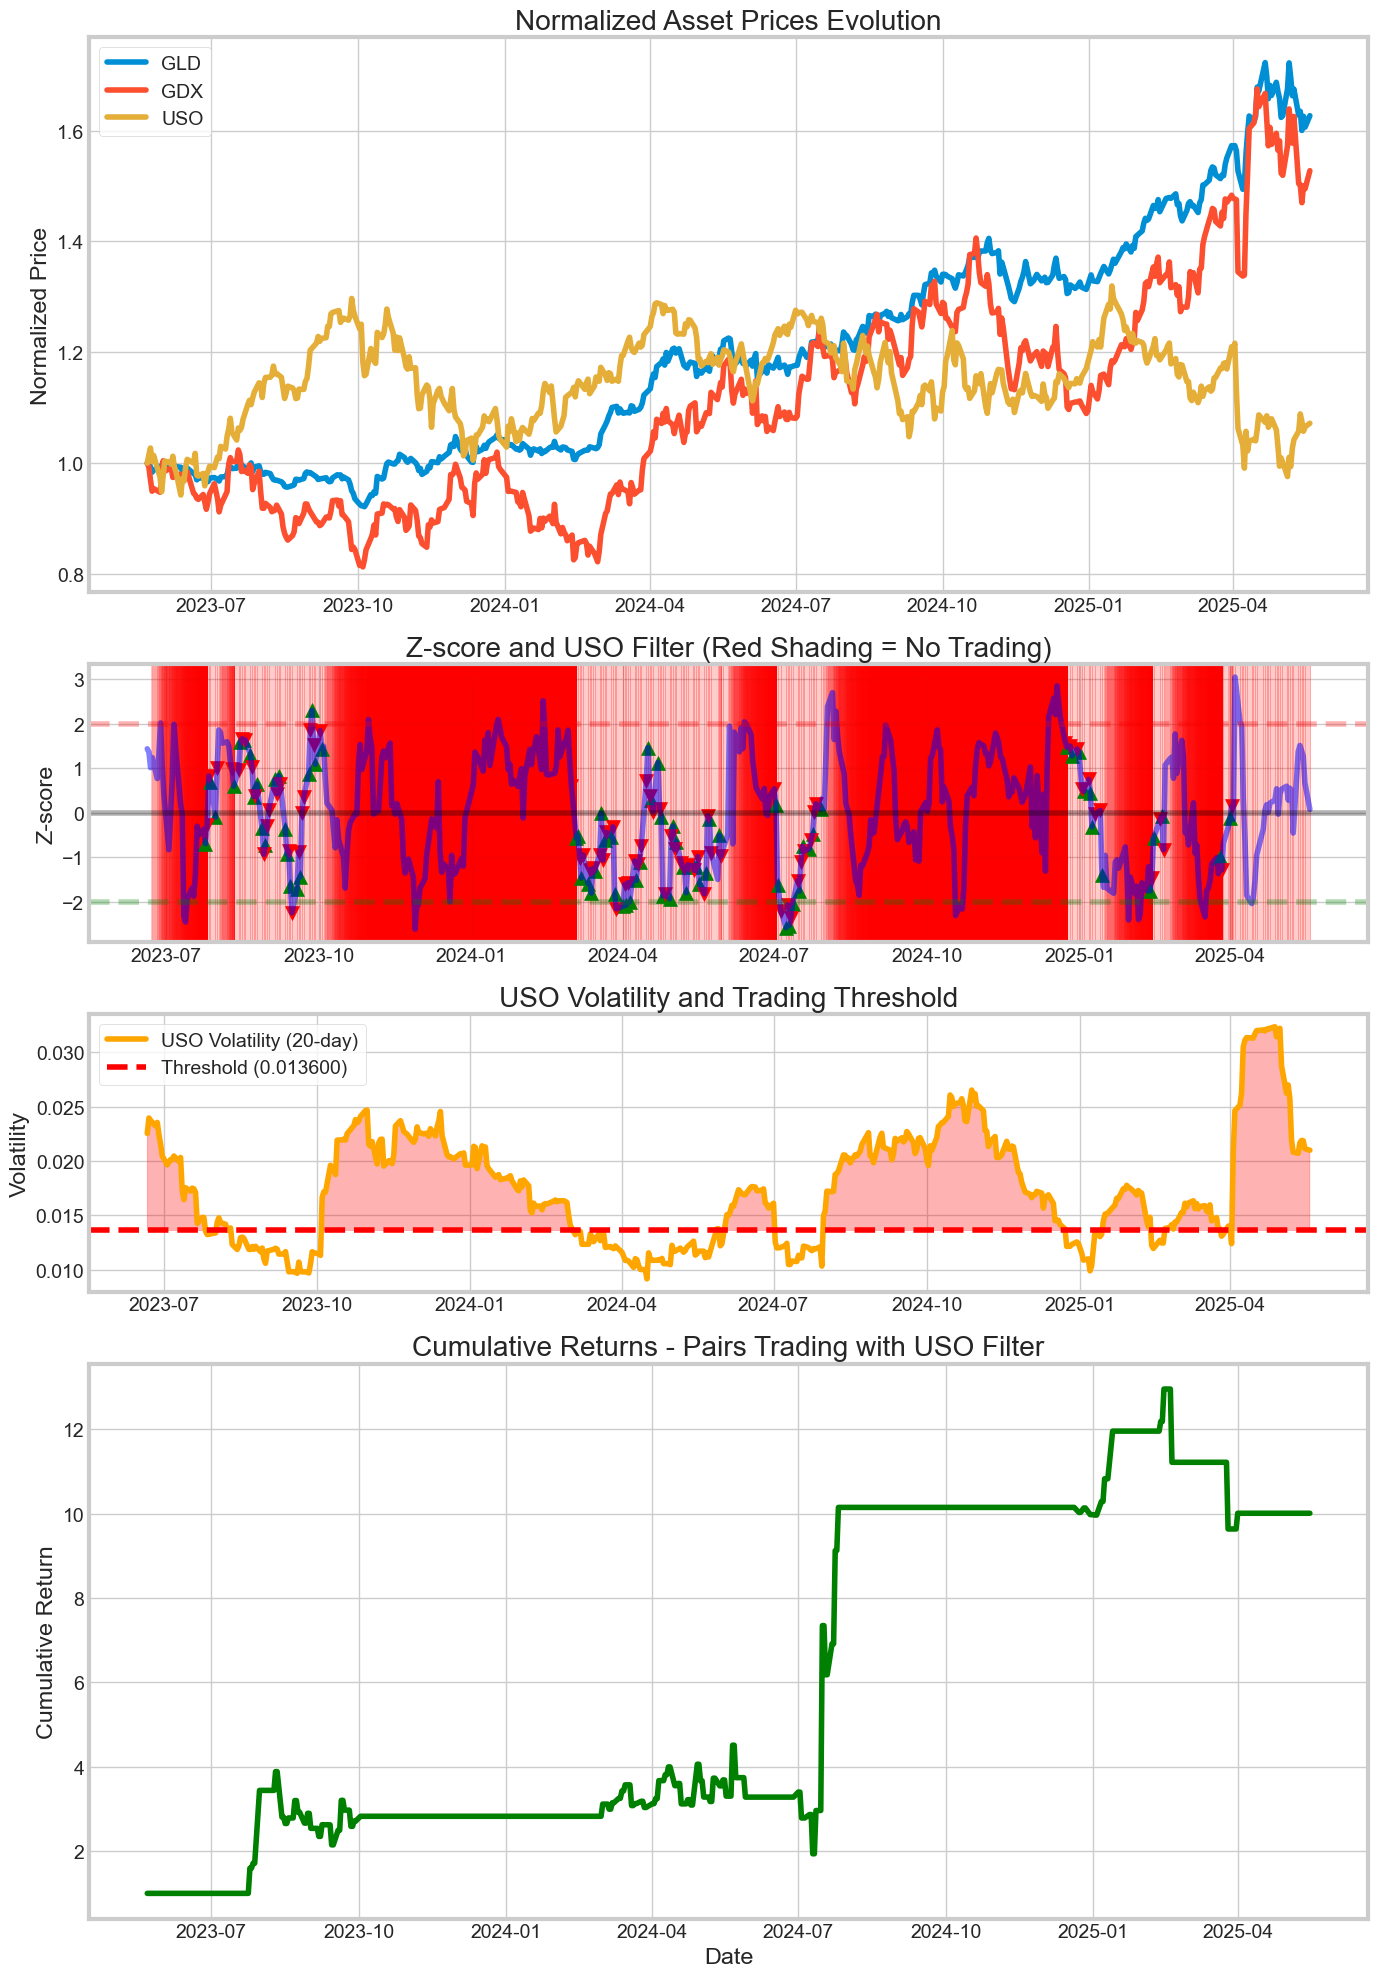

In [52]:

visualize_filtered_strategy(data, symbols, pair_spread, z_score, uso_volatility,
                           optimal_filter, filtered_strategy_returns,
                           positions_pair)
                           #optimal_threshold={'Threshold': 0.0136})

### <span style="color:royalblue">[2-E]. Compare Triplets Trading vs. Filtered Pairs trading</span>

Now we compare the above two strategies- namely, Triplets Trading and Filtered Pairs.\
For this we define a custom function that will enable us to compare and contrast the corresponding metrics of both strategies.

In [53]:
def compare_strategies(strategy1_returns, strategy2_returns,
                          strategy1_name, strategy2_name):
    """
    Compare two trading strategies across multiple performance dimensions.

    This function provides a comprehensive comparison including performance
    metrics, correlation analysis, and visual comparison of cumulative returns.

    Parameters:
    -----------
    strategy1_returns, strategy2_returns : pandas.Series
        Daily returns for each strategy
    strategy1_name, strategy2_name : str
        Names for the strategies

    Returns:
    --------
    tuple
        (comparison_dataframe, correlation_coefficient)
    """
    print(f"\n--- Strategy Comparison: {strategy1_name} vs {strategy2_name} ---")

    # Calculate metrics for both strategies
    metrics1 = calculate_metrics(strategy1_returns)
    metrics2 = calculate_metrics(strategy2_returns)

    metrics1['Trade_Days'] = len(strategy1_returns[strategy1_returns != 0])

    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        strategy1_name: [
            f"{metrics1['Total Return']:.2%}",
            f"{metrics1['Annualized Return']:.2%}",
            f"{metrics1['Volatility (annualized)']:.2%}",
            f"{metrics1['Sharpe Ratio']:.3f}",
            f"{metrics1['Sortino Ratio']:.3f}",
            f"{metrics1['Max Drawdown']:.2%}",
            f"{metrics1['Win Rate']:.2%}",
            f"{int(metrics1['Trade_Days'])}"
        ],
        strategy2_name: [
            f"{metrics2['Total Return']:.2%}",
            f"{metrics2['Annualized Return']:.2%}",
            f"{metrics2['Volatility (annualized)']:.2%}",
            f"{metrics2['Sharpe Ratio']:.3f}",
            f"{metrics2['Sortino Ratio']:.3f}",
            f"{metrics2['Max Drawdown']:.2%}",
            f"{metrics2['Win Rate']:.2%}",
            f"{int(metrics2['Number of Trades'])}"
        ]
    }, index=[
        'Total Return', 'Annualized Return', 'Volatility',
        'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown',
        'Win Rate', 'Number of Trades'
    ])

    print("Performance Comparison:")
    print("=" * 60)
    print(comparison_df)

    # Calculate correlation between strategies
    common_dates = strategy1_returns.index.intersection(strategy2_returns.index)
    if len(common_dates) > 0:
        correlation = (strategy1_returns[common_dates]
                      .corr(strategy2_returns[common_dates]))
        print(f"\nStrategy Correlation: {correlation:.3f}")

        # Direction agreement analysis
        same_direction = (np.sign(strategy1_returns[common_dates]) ==
                        np.sign(strategy2_returns[common_dates]))
        direction_agreement = same_direction.mean() * 100
        print(f"Direction Agreement: {direction_agreement:.1f}%")
    else:
        correlation = np.nan
        print("\nNo overlapping dates for correlation calculation")

    # Visualize cumulative returns comparison
    plt.figure(figsize=(14, 8))

    cum_returns1 = (1 + strategy1_returns).cumprod()
    cum_returns2 = (1 + strategy2_returns).cumprod()

    plt.plot(cum_returns1.index, cum_returns1,
            label=strategy1_name)
    plt.plot(cum_returns2.index, cum_returns2,
            label=strategy2_name)

    plt.title('Strategy Performance Comparison',
             fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Return', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return comparison_df, correlation

We visualize the above-mentioned comparison by calling the above function.


--- Strategy Comparison: Filtered Pairs Strategy vs Triplets Strategy ---
Performance Comparison:
                  Filtered Pairs Strategy Triplets Strategy
Total Return                      398.64%           197.52%
Annualized Return                 201.31%            99.75%
Volatility                        158.23%           125.03%
Sharpe Ratio                        1.272             0.798
Sortino Ratio                       4.065             1.197
Max Drawdown                      -57.05%           -80.03%
Win Rate                           58.67%            54.58%
Number of Trades                       75               480

Strategy Correlation: -0.032
Direction Agreement: 53.8%


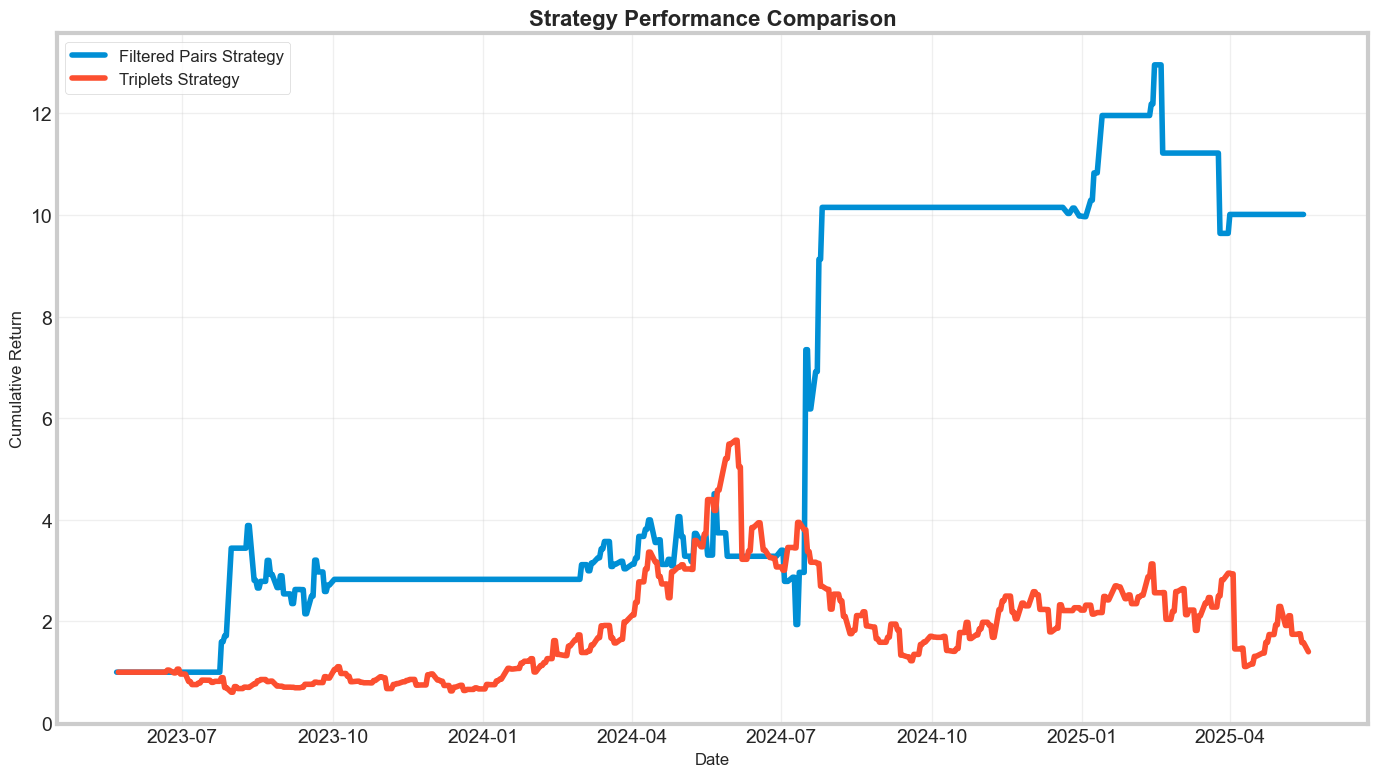

In [54]:
# Compare the strategies
comparison_df, correlation = compare_strategies(
        filtered_strategy_returns, daily_pnl,
        "Filtered Pairs Strategy", "Triplets Strategy"
)


Here we observe that the filtered pairs strategy consistently outperforms the triplets strategy across the board.\
We will now proceed to deep dive into the nature and reasons behind this phenomenon.

### <span style="color:royalblue">[2-F]. Final Analysis and Insights</span>

We define a custom function to analyze and highlight the major differences between the above 2 strategies.\
This deep-dive analysis helps understand when and why strategies diverge, providing insights into market conditions that favor one approach over
another.

In [55]:
def analyze_strategy_differences(strategy1_returns, strategy2_returns,
                                   data, symbols, uso_filter):

    """
    Analyze periods where two strategies perform significantly differently.

    
    Parameters:
    -----------
    strategy1_returns, strategy2_returns : pandas.Series
        Daily returns for the strategies
    data : pandas.DataFrame
        Price data for market condition analysis
    symbols : list
        Asset symbols for volatility calculations
    uso_filter : pandas.Series
        Filter condition series
    """
    print(f"\n--- Analyzing Strategy Differences ---")

    # Find common dates for comparison
    common_dates = (strategy1_returns.index
                   .intersection(strategy2_returns.index))

    if len(common_dates) == 0:
        print("No overlapping dates found for analysis")
        return

    # Calculate return differences
    return_diff = (strategy1_returns[common_dates] -
                  strategy2_returns[common_dates])

    # Identify outlier periods (top 5% of absolute differences)
    outlier_threshold = np.percentile(np.abs(return_diff), 95)
    outlier_periods = return_diff[np.abs(return_diff) > outlier_threshold]

    print(f"Found {len(outlier_periods)} outlier periods "
          f"(>{outlier_threshold:.3f} absolute difference)")

    if len(outlier_periods) > 0:
        print("\nTop 5 periods with largest strategy differences:")
        top_outliers = outlier_periods.abs().nlargest(5)
        for date, diff in top_outliers.items():
            actual_diff = return_diff[date]
            print(f"{date.strftime('%Y-%m-%d')}: "
                  f"{actual_diff:+.3f} difference")

    # Analyze market conditions during outlier periods
    if len(symbols) >= 3:
        # Calculate volatilities for each asset
        volatilities = {}
        for symbol in symbols:
            asset_returns = data[symbol].pct_change()
            volatilities[symbol] = asset_returns.rolling(window=20).std()

        # Compare volatilities during outlier vs normal periods
        outlier_dates = outlier_periods.index

        print(f"\nMarket volatility during outlier periods:")
        for symbol in symbols:
            if symbol in volatilities:
                vol_series = volatilities[symbol]
                outlier_vol = vol_series.loc[outlier_dates].mean()
                normal_vol = vol_series.mean()
                vol_ratio = outlier_vol / normal_vol if normal_vol > 0 else 0

                print(f"{symbol}: {outlier_vol:.4f} "
                      f"(normal: {normal_vol:.4f}, "
                      f"ratio: {vol_ratio:.2f}x)")

    # Analyze filter effectiveness
    if uso_filter is not None:
        filter_active_days = (~uso_filter).sum()
        total_days = len(uso_filter)
        filter_percentage = filter_active_days / total_days * 100

        print(f"\nFilter Analysis:")
        print(f"Filter active (no trading): {filter_percentage:.1f}% of days")
        print(f"Total filtered days: {filter_active_days}")

    return outlier_periods, filter_percentage


We proceed to analyze the differences by calling the above function.

In [56]:
# Analyze differences between strategies
outlier_periods, filter_perc = analyze_strategy_differences(
        filtered_strategy_returns, daily_pnl, data, symbols, optimal_filter
)



--- Analyzing Strategy Differences ---
Found 25 outlier periods (>0.245 absolute difference)

Top 5 periods with largest strategy differences:
2024-07-16: +1.479 difference
2023-07-31: +1.137 difference
2024-07-12: +0.530 difference
2023-07-25: +0.511 difference
2025-04-04: +0.504 difference

Market volatility during outlier periods:
GLD: 0.0085 (normal: 0.0090, ratio: 0.95x)
GDX: 0.0198 (normal: 0.0200, ratio: 0.99x)
USO: 0.0141 (normal: 0.0175, ratio: 0.81x)

Filter Analysis:
Filter active (no trading): 71.1% of days
Total filtered days: 355


### <span style="color:royalblue">[2-G]. Advanced Analysis</span>

Here we examine the market regime analysis to ascertain the effectiveness of the volatility filter (for our filtered pairs strategy).

In [57]:
# Market regime analysis
print(f"\nMarket Regime Analysis:")
print("-" * 30)

# Calculate how often each filter condition occurs
filter_stats = optimal_filter.value_counts(normalize=True) * 100
print(f"Trading allowed: {filter_stats.get(True, 0):.1f}% of days")
print(f"Filter active (no trading): {filter_stats.get(False, 0):.1f}% of days")

# Analyze performance during different market conditions
high_vol_periods = uso_volatility > uso_volatility.quantile(0.8)
low_vol_periods = uso_volatility < uso_volatility.quantile(0.2)

print(f"\nUSO Volatility Regime Analysis:")
print(f"High volatility periods (>80th percentile): "
      f"{high_vol_periods.sum()} days")
print(f"Low volatility periods (<20th percentile): "
      f"{low_vol_periods.sum()} days")



Market Regime Analysis:
------------------------------
Trading allowed: 28.9% of days
Filter active (no trading): 71.1% of days

USO Volatility Regime Analysis:
High volatility periods (>80th percentile): 96 days
Low volatility periods (<20th percentile): 96 days


### <span style="color:royalblue">[2-H]. Final Recommendations</span>

Herein, we present our comparisions in a visually appealing format for enhanced clarity.

In [59]:
# Final Recommendations
# =============================
print(f"\n" + "="*80)
print("FINAL ANALYSIS AND RECOMMENDATIONS")
print("="*80)

eq_weight_returns = data.pct_change().mean(axis=1).iloc[1:]
metrics1 = calculate_metrics(filtered_strategy_returns)
metrics2 = calculate_metrics(daily_pnl)
benchmark_metrics = calculate_metrics(eq_weight_returns)


# Determine if the strategy is worthwhile
strategy1_sharpe = metrics1['Sharpe Ratio']
strategy2_sharpe = metrics2['Sharpe Ratio']
benchmark_sharpe = benchmark_metrics['Sharpe Ratio']

print(f"\nStrategy Assessment:")
print(f"• Filtered Pairs Sharpe Ratio: {strategy1_sharpe:.3f}")
print(f"• Triplets Strategy Sharpe Ratio: {strategy2_sharpe:.3f}")
print(
f"• Benchmark (Equal Weighted Portfolio) Sharpe Ratio: {benchmark_sharpe:.3f}"
)

if strategy1_sharpe > benchmark_sharpe:
    improvement = ((strategy1_sharpe / benchmark_sharpe - 1) * 100
                  if benchmark_sharpe > 0 else 0)
    print(
    f"✓ Filtered Pairs Strategy outperforms benchmark by {improvement:.1f}%")
    print(f"✓ The USO volatility filter appears effective")
else:
    underperformance = ((benchmark_sharpe / strategy1_sharpe - 1) * 100
                       if strategy1_sharpe > 0 else 0)
    print(f"❌ Filtered Pairs Strategy underperforms benchmark by {underperformance:.1f}%")
    print(f"❌ Consider revising the Filtered Pairs approach or parameters")

if strategy2_sharpe > benchmark_sharpe:
    improvement = ((strategy2_sharpe / benchmark_sharpe - 1) * 100
                  if benchmark_sharpe > 0 else 0)
    print(f"✓ Triplets Trading Strategy outperforms benchmark by {improvement:.1f}%")
    print(f"✓ The triplets strategy appears effective")
else:
    underperformance = ((benchmark_sharpe / strategy2_sharpe - 1) * 100
                       if strategy2_sharpe > 0 else 0)
    print(f"❌ Triplets Trading Strategy underperforms benchmark by {underperformance:.1f}%")
    print(f"❌ Consider revising the Triplets Trading approach or parameters")

print(f"\nKey Insights:")
print(f"• Optimal USO volatility threshold: "
       f"{optimal_threshold['Threshold']:.6f} "
       f"({optimal_threshold['Percentile']:.0f}th percentile)")
print(f"• Filtered Pairs is active {filter_stats.get(True, 0):.1f}% of the time")
print(f"• Filtered Pairs Win rate: {metrics1['Win Rate']:.1%}")
print(f"• The Maximum drawdown limited to {metrics1['Max Drawdown']:.1%}")

print(f"\nRisk Management Observations:")
if metrics1['Max Drawdown'] < benchmark_metrics['Max Drawdown']:
    print(
    f"✓ Filtered Pairs Strategy reduces maximum drawdown vs equal-weighted benchmark"
    )
else:
    print(
    f"⚠ Filtered Pairs Strategy has higher drawdown than equal-weighted benchmark"
    )

if metrics2['Max Drawdown'] < benchmark_metrics['Max Drawdown']:
    print(
    f"✓ Triplets Trading Strategy reduces maximum drawdown vs equal-weighted benchmark"
    )
else:
    print(
    f"⚠ Triplets Trading Strategy has higher drawdown than equal-weighted benchmark"
    )

if metrics1['Win Rate'] > 0.5:
    print(
    f"✓ Filtered Pairs Strategy has high win rate ({metrics1['Win Rate']:.1%})"
    )
else:
    print(
    f"⚠ Filtered Pairs Strategy has low win rate - consider adjusting parameters"
    )

if metrics2['Win Rate'] > 0.5:
    print(
    f"✓ Triplets Trading Strategy has high win rate ({metrics2['Win Rate']:.1%})"
    )
else:
    print(
    f"⚠ Triplets Trading Strategy has low win rate - consider adjusting parameters"
    )

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


FINAL ANALYSIS AND RECOMMENDATIONS

Strategy Assessment:
• Filtered Pairs Sharpe Ratio: 1.272
• Triplets Strategy Sharpe Ratio: 0.798
• Benchmark (Equal Weighted Portfolio) Sharpe Ratio: 1.016
✓ Filtered Pairs Strategy outperforms benchmark by 25.2%
✓ The USO volatility filter appears effective
❌ Triplets Trading Strategy underperforms benchmark by 27.4%
❌ Consider revising the Triplets Trading approach or parameters

Key Insights:
• Optimal USO volatility threshold: 0.013600 (30th percentile)
• Filtered Pairs is active 28.9% of the time
• Filtered Pairs Win rate: 58.7%
• The Maximum drawdown limited to -57.1%

Risk Management Observations:
✓ Filtered Pairs Strategy reduces maximum drawdown vs equal-weighted benchmark
✓ Triplets Trading Strategy reduces maximum drawdown vs equal-weighted benchmark
✓ Filtered Pairs Strategy has high win rate (58.7%)
✓ Triplets Trading Strategy has high win rate (54.6%)

ANALYSIS COMPLETE


## <span style="color:royalblue">Implementation Considerations</span>

• Transaction costs and slippages are not included in this analysis\
• Strategy would require daily monitoring and rebalancing\
• Market conditions may change, requiring periodic re-optimization\
• Need to consider position sizing and risk management overlays\
• The triplets strategy requires allocating capital across three assets (more complex)

## <span style="color:royalblue">Conclusions</span>

The choice between these strategies depends on the investment objectives:\
• <b>Triplets Trading</b>: Lower potential risk-adjusted returns with more complex implementation and potentially lower win rate\
• <b>Filtered Pairs Trading</b>: More conservative approach with built-in market regime detection via USO volatility filter for superior KPIs

The USO volatility threshold serves as an effective circuit breaker that prevents trading when market conditions are likely to disrupt the statistical relationship between gold and gold miners. This approach demonstrates how oil price volatility can be used not just as a trading instrument but as a valuable signal for enhancing other trading strategies.